# 2. Descriptive Statistics
## Outline
* [Frequency](#frequency)
* [Measures of central tendency](#measuresOfCentralTendency)
* [Measures of dispersion](#measuresOfDispersion)
* [Normalization and Standardization](#normalizationAndStandardization)
* [Coefficients of correlation](#coefficientsOfCorrelation)

## Frequency<a name="frequency" />

資料常常需要計算出現的頻率，`.value_counts()` 可以統計某個欄位中每個值出現的次數。

In [1]:
import pandas as pd
from pathlib import Path
data_folder = Path("../data/")

news = pd.read_csv(data_folder / "news.csv")
news.head()

,title,content,time,provider,url
0,「把25年前韓國瑜打人事件當英雄看」陳水扁批：吳敦義「災難政治學」的表現,國民黨主席吳敦義日前提到高雄市長候選人韓國瑜過去打陳水扁，表示「很認同跟敬佩」並形容「允文允...,2018-10-22 12:16:02+08:00,風傳媒,https://tw.news.yahoo.com/把25年前韓國瑜打人事件當英雄看-陳水扁...
1,【Yahoo論壇／林青弘】柯文哲是否一再說謊？,柯文哲市長在台北市北投區七星公園造勢，行動競選總部的大卡車開進公園，違規臨停。競辦被開罰六張...,2018-10-22 14:00:26+08:00,林青弘,https://tw.news.yahoo.com/【yahoo論壇%EF%BC%8F林青弘...
2,【Yahoo論壇】民進黨誰最怕陳其邁落選？,讀者投書：廖念漢（現任奇策盟文宣部主任、曾任海巡署專聘講師）\n 《長平之戰》是戰國時代最戲...,2018-10-22 13:57:44+08:00,讀者投書,https://tw.news.yahoo.com/【yahoo論壇】民進黨誰最怕陳其邁落選...
3,抽中籤王 韓國瑜車隊掃街 民眾路邊紛比讚,國民黨高雄市長候選人韓國瑜聲勢上漲，又抽中一號籤王，心情相當興奮，立即展開掃街拜，經過的地方...,2018-10-22 13:32:00+08:00,EBC東森新聞,https://tw.news.yahoo.com/抽中籤王-韓國瑜車隊掃街-民眾路邊紛比讚...
4,百年土地公上香祈福 陳學聖提五不原則,【綜合報導】普悠瑪列車出軌意外舉國震驚如同國難，令社會大眾、競選團隊及陳學聖本人都感到十分沉...,2018-10-22 13:17:44+08:00,民眾日報,https://tw.news.yahoo.com/百年土地公上香祈福-陳學聖提五不原則-0...


In [2]:
news['provider'].value_counts()

中央社               14
聯合新聞網             13
今日新聞NOWnews       11
新頭殼               11
風傳媒               11
三立新聞網 setn.com    10
民眾日報              10
TVBS新聞網            9
民視                 7
台灣好新聞報             6
EBC東森新聞            6
華視                 3
中華日報               2
信傳媒                2
讀者投書               1
壹電視影音              1
林青弘                1
上報                 1
詹為元                1
Name: provider, dtype: int64

In [3]:
word = '柯文哲' 
news[word] = [word in text for text in news.content]
news[word].value_counts()

False    84
True     36
Name: 柯文哲, dtype: int64

In [4]:
word = '姚文智' 
news[word] = [word in text for text in news.content]
pd.crosstab(news["柯文哲"], news["姚文智"])

姚文智,False,True
柯文哲,,
False,76,8
True,12,24


In [5]:
word = '民進黨'
news[word] = [text.count(word) for text in news.content]
news[word].value_counts()

0     42
1     29
2     17
3     12
5      7
4      5
6      3
9      2
11     1
8      1
7      1
Name: 民進黨, dtype: int64

## Measures of central tendency<a name="measuresOfCentralTendency" />
可以使用 `.mode()` 得到眾數、`.median()` 得到中位數、`.mean()` 得到平均數。

In [6]:
# mode
news['provider'].mode()

0    中央社
dtype: object

In [7]:
# count the news length
news['length'] = news['content'].apply(len)

In [8]:
# median
news['length'].median()

680.5

In [9]:
# mean
news['length'].mean()

699.4833333333333

### Measures of dispersion<a name="measuresOfDispersion" />
可以用 `.max()` 得到最大值、`.min()` 得到最小值、相減即為全距。  
可以用 `.quantile()` 得到百分位數、`.std()` 得到標準差、`.var()` 得到變異數。  
`.describe()` 則是數據表格的統計，包含平均數、標準差、最大最小值、中位數和四分位數。

In [10]:
# range
news.length.max() - news.length.min()

1885

In [11]:
# Quantiles and quartiles 
news.length.quantile(0.25)

526.5

In [12]:
# Standard deviation
news.length.std()

319.96102660076804

In [13]:
# Variance
news.length.var()

102375.0585434174

In [14]:
news.length.std() ** 2

102375.05854341738

In [15]:
news.describe()

,民進黨,length
count,120.000000,120.000000
mean,1.800000,699.483333
std,2.198548,319.961027
min,0.000000,63.000000
25%,0.000000,526.500000
50%,1.000000,680.500000
75%,3.000000,832.000000
max,11.000000,1948.000000


### Normalization and Standardization<a name="normalizationAndStandardization" />
在建立模型前，通常會成資料標準化，常見的方法有下面兩種。  
Normalization:  
$ x_{\text{norm}} = (x-x_{\text{min}}) / (x_{\text{max}} - x_{\text{min}}) $  
$x_{\text{norm}}$'s are between 0 and 1.

Standardization:  
$ x_{\text{std}} = (x-\mu) / \sigma $  
$x_{\text{std}}$'s have mean 0 and standard deviation 1.


In [16]:
news['length_norm'] = (news.length - news.length.min())/(news.length.max() - news.length.min())
news['length_std'] = (news.length - news.length.mean())/news.length.std()

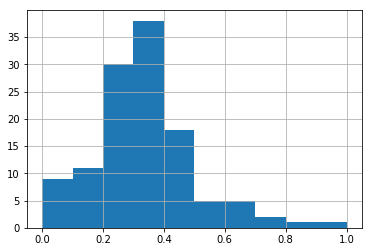

In [17]:
%matplotlib inline

news['length_norm'].hist()

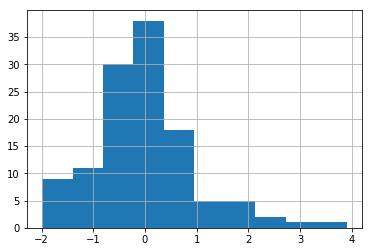

In [18]:
news['length_std'].hist()

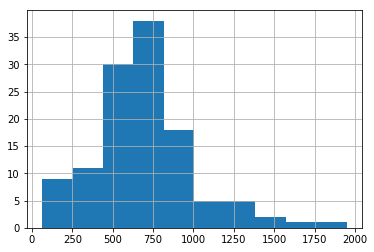

In [19]:
news['length'].hist()

### Coefficients of correlation<a name="coefficientsOfCorrelation" />

可以使用 `.corr()` 來看兩個欄位之間的相關係數（預設是 Pearson ， 也可以用 Kendall 或Spearman 的方法）。

In [20]:
news.loc[:,['柯文哲','姚文智','民進黨']].corr()

,柯文哲,姚文智,民進黨
柯文哲,1.000000,0.592157,-0.031563
姚文智,0.592157,1.000000,0.227232
民進黨,-0.031563,0.227232,1.000000
